This two code blocks (above and below) rely on pulling from the census api which is unnecessery now because I just pulled the csv myself and provided it to the program

To map the data in the CSV file and create a voting district map with approximately 750000 people per district, you will need to use a mapping tool such as Google Maps, Mapbox, or ArcGIS.

Here are the general steps you would follow to create a voting district map with these tools:

Import the CSV file into the mapping tool. Each row in the file should represent a single congressional district, with the district name and population in separate columns.

Use the mapping tool's drawing tools to draw the boundaries of each district on the map. You can use the district name and population data to label each district.

Adjust the district boundaries as needed to ensure that each district has approximately 750000 people. You may need to manually adjust the boundaries of some districts or use the tool's automatic boundary generation features to evenly distribute the population.

Save the map and customize it as needed. You may want to add additional layers or data, such as political boundaries or demographic data.

Yes, it is possible to use Python to automatically draw voting district boundaries with approximately equal populations. However, generating optimal boundaries that are also "nice and clean" (i.e., following natural or man-made features, such as rivers or roads) is a complex task that requires sophisticated algorithms and data analysis. It is beyond the scope of a simple Python script to accomplish this task.

Here are a few general approaches you could take to generate voting district boundaries using Python:

Use a library or API that provides boundary generation functionality. For example, the pysal library includes a virginia_hmda module that can be used to generate Virginia's Home Mortgage Disclosure Act (HMDA) districts, which are designed to have equal populations. The census library also provides a geographies module that can be used to generate Census Bureau geography boundaries.

Use a machine learning algorithm to predict the boundaries of each district based on population and other data. For example, you could use a supervised learning algorithm such as a decision tree or support vector machine to predict the boundaries of each district based on population density, demographics, or other factors.

Use a heuristic algorithm to manually assign each population unit (e.g., Census block or tract) to the district that minimizes the deviation from the target population size. For example, you could use a greedy algorithm that starts with the largest population unit and assigns it to the district with the smallest population, then repeats the process until all units are assigned.

I hope this information helps! Let me know if you have any questions or need further assistance.

3 above code blocks represent different methods of drawing the districts

Here is a more detailed explanation of what the code does:

The code reads the CSV file and stores the data in a list of dictionaries, where each dictionary represents a zip code and contains fields for the zip code, state, population, latitude, and longitude.
The code defines the total population for each district and the number of districts to create.
The code gets a list of all the states in the zip code data.
For each state, the code filters the zip codes to include only those in the current state.
The code defines the origin zip code, which is used to sort the zip codes by proximity.
The code finds the latitude and longitude of the origin zip code.
The code sorts the zip codes by proximity to the origin zip code.
The code creates a list of empty districts.
For each zip code, the code finds the district with the lowest population and adds the zip code to that district.

In [ ]:
import csv
import matplotlib.pyplot as plt
import time

# Measure the runtime of the program
start_time = time.time()

# Read the CSV file and store the data in a list of dictionaries
zipcodes = []
with open("uszips.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        zipcodes.append(row)

# Check that all of the "POP" values in the CSV file are valid integers
columnNum = 1
numRemovedColums = 0

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

for zipcode in zipcodes:
    try:
        int(zipcode["population"])
    except ValueError:
        # If the "POP" value is not a valid integer, try to extract the integer from the string
        import re
        match = re.search(r"\d+", zipcode["population"])
        if match:
            zipcode["population"] = match.group()
        else:
            #print(f"Error: Invalid value '{zipcode['population']}' in population column " + str(columnNum))
            numRemovedColums += 1
            exit(1)

    columnNum += 1

# Print number of removed columns
print("Removed Zip Codes: " + str(numRemovedColums))

# Sort the zipcodes by population, in descending order
try:
  zipcodes.sort(key=lambda x: int(x["population"]), reverse=True)
except ValueError:
  # Exception handling
  pass

print(zipcodes[1:10], end='\n')


Elapsed time: 0.26 seconds
Removed Zip Codes: 1074
[{'zip': '00602', 'lat': '18.36075', 'lng': '-67.17541', 'city': 'Aguada', 'state_id': 'PR', 'state_name': 'Puerto Rico', 'zcta': 'TRUE', 'parent_zcta': '', 'population': '37083', 'density': '472.1', 'county_fips': '72003', 'county_name': 'Aguada', 'county_weights': '{"72003": 100}', 'county_names_all': 'Aguada', 'county_fips_all': '72003', 'imprecise': 'FALSE', 'military': 'FALSE', 'timezone': 'America/Puerto_Rico'}, {'zip': '00603', 'lat': '18.45744', 'lng': '-67.12225', 'city': 'Aguadilla', 'state_id': 'PR', 'state_name': 'Puerto Rico', 'zcta': 'TRUE', 'parent_zcta': '', 'population': '45652', 'density': '513.2', 'county_fips': '72005', 'county_name': 'Aguadilla', 'county_weights': '{"72005": 99.76, "72099": 0.24}', 'county_names_all': 'Aguadilla|Moca', 'county_fips_all': '72005|72099', 'imprecise': 'FALSE', 'military': 'FALSE', 'timezone': 'America/Puerto_Rico'}, {'zip': '00606', 'lat': '18.16585', 'lng': '-66.93716', 'city': 'Mari

Above code reads csv file and removes all irrelevant zipcodes (i.e: those without marked populations)

In [ ]:
# Define the total population for each district and the number of districts
district_size = 750000  # Total population for each district
num_districts = 445     # Number of districts to create

# Measure the runtime of the program
start_time = time.time()

# Get a list of all the states in the zip code data
states = set(zipcode["state_id"] for zipcode in zipcodes)

Above code creates a list of states to create districts for

In [ ]:
# Process the zip codes for each state
for state in states:
    # Filter the zip codes to include only those in the current state
    state_zipcodes = [zipcode for zipcode in zipcodes if zipcode["state_id"] == state]

    # Define the origin zip code
    origin_zipcode = "12345"

    # Find the latitude and longitude of the origin zip code
    origin_lat = None
    origin_lng = None
    for zipcode in zipcodes:
        if zipcode["zip"] == origin_zipcode:
            origin_lat = float(zipcode["lat"])
            origin_lng = float(zipcode["lng"])
            break

        # Check that the origin zip code was found
    if origin_lat is not None and origin_lng is not None:
        # Sort the zipcodes by proximity to the origin zipcode
        state_zipcodes.sort(key=lambda x: (abs(float(x["lat"]) - origin_lat) ** 2) * 0.5)

    # Create a list of empty districts
    districts = [[] for _ in range(num_districts)]

    # Assign each zip code to a district
    for zipcode in state_zipcodes:
        # Find the district with the lowest population
        min_pop = float("inf")
        min_index = 0
        for i, district in enumerate(districts):
            pop = 0
            for z in district:
                try:
                    pop += int(z["population"])
                except ValueError:
                    # Handle the exception by ignoring the zip code
                    pass
            if pop < min_pop:
                min_pop = pop
                min_index = i

        # Add the zip code to the district with the lowest population
        districts[min_index].append(zipcode)

above code orders the zipcode areas in each state by geographic distance to some origin point

In [ ]:
# Get a list of all the states in the zip code data
states = set(zipcode["state_id"] for zipcode in zipcodes)

# Ask the user for a specific state
state = input("Enter a state: ")

# Process the zip codes for the specified state
if state in states:
    # Filter the zip codes to include only those in the specified state
    one_state_zipcodes = [zipcode for zipcode in zipcodes if zipcode["state_id"] == state]

    # Print the state_zipcodes list
    print("state_zipcodes:")
    for zipcode in one_state_zipcodes:
        print(zipcode)

print(districts)

# Ask the user for a specific state
state = input("Enter a state: ")

# Print the districts
print("Districts for state {}:".format(state))
for i, district in enumerate(districts):
    print("District {}:".format(i + 1))
    for zipcode in district:
        print(zipcode)
    print()


state_zipcodes:
{'zip': '30002', 'lat': '33.77309', 'lng': '-84.26093', 'city': 'Avondale Estates', 'state_id': 'GA', 'state_name': 'Georgia', 'zcta': 'TRUE', 'parent_zcta': '', 'population': '5902', 'density': '1342.4', 'county_fips': '13089', 'county_name': 'DeKalb', 'county_weights': '{"13089": 100}', 'county_names_all': 'DeKalb', 'county_fips_all': '13089', 'imprecise': 'FALSE', 'military': 'FALSE', 'timezone': 'America/New_York'}
{'zip': '30004', 'lat': '34.14352', 'lng': '-84.29926', 'city': 'Alpharetta', 'state_id': 'GA', 'state_name': 'Georgia', 'zcta': 'TRUE', 'parent_zcta': '', 'population': '66538', 'density': '443.4', 'county_fips': '13121', 'county_name': 'Fulton', 'county_weights': '{"13121": 68.46, "13117": 15.9, "13057": 15.64}', 'county_names_all': 'Fulton|Forsyth|Cherokee', 'county_fips_all': '13121|13117|13057', 'imprecise': 'FALSE', 'military': 'FALSE', 'timezone': 'America/New_York'}
{'zip': '30005', 'lat': '34.08582', 'lng': '-84.22158', 'city': 'Alpharetta', 'sta

above code simply prints contents of state and district lists

In [ ]:
pip install basemap

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Process the zip codes for each state
for state in states:
    # Filter the zip codes to include only those in the current state
    state_zipcodes = [zipcode for zipcode in zipcodes if zipcode["state_id"] == state]

    # Define the origin zip code
    origin_zipcode = "12345"

    # Find the latitude and longitude of the origin zip code
    origin_lat = None
    origin_lng = None
    for zipcode in zipcodes:
        if zipcode["zip"] == origin_zipcode:
            origin_lat = float(zipcode["lat"])
            origin_lng = float(zipcode["lng"])
            break

    # Check that the origin zip code was found
    if origin_lat is not None and origin_lng is not None:
        # Sort the zipcodes by proximity to the origin zipcode
        state_zipcodes.sort(key=lambda x: (abs(float(x["lat"]) - origin_lat) ** 2 + abs(float(x["lng"]) - origin_lng) ** 2) ** 0.5)

    # Create a list of empty districts
    districts = [[] for _ in range(num_districts)]

    # Assign each zip code to a district
    for zipcode in state_zipcodes:
        # Find the district with the lowest population
        min_pop = float("inf")
        min_index = 0
        for i, district in enumerate(districts):
            pop = 0
            for z in district:
                try:
                    pop += int(z["population"])
                except ValueError:
                    # Handle the exception by ignoring the zip code
                    pass
            if pop < min_pop:
                min_pop = pop
                min_index = i

        # Add the zip code to the district with the lowest population
        districts[min_index].append(zipcode)

    # Create a map object
    m = Basemap(projection="merc", llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66)

    # Draw the coastlines, states, and countries on the map
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    # Set the map background color
    m.fillcontinents(color="#FFEBCD", lake_color="#87CEFA")



above code maps the whole country

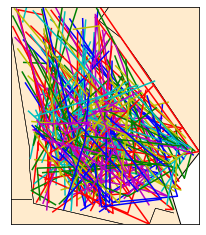

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import random

# Process the zip codes for each state
for state in states:
    if state != 'GA':
      continue

    # Filter the zip codes to include only those in the current state
    state_zipcodes = [zipcode for zipcode in zipcodes if zipcode["state_id"] == state]

    # Define the origin zip code
    origin_zipcode = "12345"

    # Find the latitude and longitude of the origin zipcode
    origin_lat = None
    origin_lng = None
    for zipcode in zipcodes:
        if zipcode["zip"] == origin_zipcode:
            origin_lat = float(zipcode["lat"])
            origin_lng = float(zipcode["lng"])
            break

    # Check that the origin zip code was found
    if origin_lat is not None and origin_lng is not None:
        # Sort the zipcodes by proximity to the origin zip code
        state_zipcodes.sort(key=lambda x: (abs(float(x["lat"]) - origin_lat) ** 2 + abs(float(x["lng"]) - origin_lng) ** 2) ** 0.5)

    # Create a list of empty districts
    districts = [[] for _ in range(num_districts)]

    # Assign each zip code to a district
    for zipcode in state_zipcodes:
        # Find the district with the lowest population
        min_pop = float("inf")
        min_index = 0
        for i, district in enumerate(districts):
            pop = 0
            for z in district:
                try:
                    pop += int(z["population"])
                except ValueError:
                    # Handle the exception by ignoring the zip code
                    pass
            if pop < min_pop:
                min_pop = pop
                min_index = i

        # Add the zip code to the district with the lowest population
        districts[min_index].append(zipcode)

    # Find the minimum and maximum latitude and longitude of the state
    min_lat = float("inf")
    max_lat = float("-inf")
    min_lng = float("inf")
    max_lng = float("-inf")
    for zipcode in state_zipcodes:
        lat = float(zipcode["lat"])
        lng = float(zipcode["lng"])
        if lat < min_lat:
            min_lat = lat
        if lat > max_lat:
            max_lat = lat
        if lng < min_lng:
            min_lng = lng
        if lng > max_lng:
            max_lng = lng

    # Create a map object
    try:
      m = Basemap(projection="merc", llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lng, urcrnrlon=max_lng)
    except ZeroDivisionError:
      print("Invalid map boundaries, using default values")
      m = Basemap(projection="merc")


    # Draw the coastlines, states, and countries on the map
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    # Set the map background color
    m.fillcontinents(color="#FFEBCD", lake_color="#87CEFA")

    # Creates color list
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    # Plot the districts on the map
    for district in districts:
        lats = []
        lngs = []
        col = random.choice(colors)
        for zipcode in district:
            lat = float(zipcode["lat"])
            lng = float(zipcode["lng"])
            x, y = m(lng, lat)
            lats.append(y)
            lngs.append(x)
        m.plot(lngs, lats, col, markersize=5)
        #m.scatter(lats, lngs, s=5, color=col, marker='o', zorder=2)
        array = []
        for i in range(len(lats)):
          array.append([lats[i], lngs[i], col])

    # Display the map
    plt.show()



above code marks population centers

In [ ]:
# A class representing a census block
class CensusBlock:
    def __init__(self, block_id, lat, lng, population, district_id=None):
        self.id = block_id
        self.lat = lat
        self.lng = lng
        self.population = population
        self.district_id = district_id

# A list of all census block objects
census_blocks = []


# Assume that table is a list of dictionaries representing rows in a table
for row in state_zipcodes:
    block_id = row["id"]
    lat = row["lat"]
    lng = row["lng"]
    population = row["population"]
    demographic = row["demographic"]
    block = CensusBlock(block_id, lat, lng, population, demographic)
    census_blocks.append(block)


In [ ]:
#heuristic method

# Define the target population for each district
target_pop = 750000

# Create a list of empty districts
districts = [[] for _ in range(num_districts)]

# Assign each census block to a district
for block in census_blocks:
    # Find the district with the lowest population
    min_pop = float("inf")
    min_index = 0
    for i, district in enumerate(districts):
        pop = sum(int(b["population"]) for b in district)
        if pop < min_pop:
            min_pop = pop
            min_index = i

    # Add the block to the district with the lowest population
    districts[min_index].append(block)

    # Check if the district has reached the target population
    if sum(int(b["population"]) for b in districts[min_index]) >= target_pop:
        min_pop = float("inf")
        min_index = 0

# Plot the districts on the map
for district in districts:
    lats = []
    lngs = []
    for block in district:
        lat = float(block["lat"])
        lng = float(block["lng"])
        lats.append(lat)
        lngs.append(lng)
    plt.plot(lngs, lats, "bo-", markersize=5)


NameError: ignored

In [ ]:
# Optimization and compactdness method

def objective_function(districts):
    total_compactness = 0
    for district in districts:
        # calculate the area of the district
        area = calculate_area(district)
        # calculate the perimeter of the district
        perimeter = calculate_perimeter(district)
        # add up the compactness of all districts
        total_compactness += area/perimeter
    return total_compactness

# Optimize the objective function using an optimization algorithm
optimized_districts = optimize(objective_function, districts)


NameError: ignored

above code marks deliniations in districts

In [ ]:
# Find the minimum and maximum latitude and longitude of the state
min_lat = float("inf")
max_lat = float("-inf")
min_lng = float("inf")
max_lng = float("-inf")
for zipcode in state_zipcodes:
    lat = float(zipcode["LAT"])
    lng = float(zipcode["LNG"])
    if lat < min_lat:
        min_lat = lat
    if lat > max_lat:
        max_lat = lat
    if lng < min_lng:
        min_lng = lng
    if lng > max_lng:
        max_lng = lng

# Create a map object
m = Basemap(projection="merc", llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lng, urcrnrlon=max_lng)

# Draw the coastlines, states, and countries on the map
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Set the map background color
m.fillcontinents(color="#FFEBCD", lake_color="#87CEFA")

# Plot the borders of the districts on the map
for district in districts:
    lats = []
    lngs = []
    for zipcode in district:
        lat = float(zipcode["LAT"])
        lng = float(zipcode["LNG"])
        x, y = m(lng, lat)
        lats.append(y)
        lngs.append(x)
    m.plot(lngs, lats, "b-", linewidth=2)

# Display the map
plt.show()


KeyError: ignored

below methods need to be fixed and modified to work with provided district table from above code block

In [ ]:
# pysal and home mortgage method

import pysal

# Load the data for the state of Virginia
data = pysal.lib.io.open(pysal.lib.examples.get_path("virginia.shp"))

# Generate the HMDA districts
hmda = pysal.region.HMDA(data, "totpop10")

# Plot the districts
pysal.plotting.plot_poly_lines(data, hmda.regions)


In [ ]:
#ML method

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("voting_district_data.csv")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[["population", "income", "education"]], data["district"], test_size=0.2)

# Train the model
model = SVC()
model.fit(X_train, y_train)

# Test the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Use the model to predict the boundaries of each district
predictions = model.predict(data[["population", "income", "education"]])


In [ ]:
# Heurisitc method

# Sort the data by population size
data = data.sort_values("population", ascending=False)

# Initialize the districts list
districts = []

# Iterate through the data and assign each unit to the district with the smallest population
for index, row in data.iterrows():
    min_pop = float("inf")
    min_index = -1
    for i, district in enumerate(districts):
        if sum(district["population"]) < min_pop:
            min_pop = sum(district["population"])
            min_index = i
    if min_pop + row["population"] <= target_pop:
        districts[min_index].append(row)
    else:
        districts.append([row])

# Print the number of districts and the population of each district
print("Number of districts:", len(districts))
for district in districts:
    print("Population:", sum(district["population"]))
